# 1. Linear Regression
### 공부 시간에 따른 시험 점수

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('LinearRegressionData.csv') #판다스로 csv파일 불러오기

In [3]:
dataset.head() #상위 5개 데이터를 불러오기

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


독립변수와 종속변수를 분리   
여기서는 하나씩 있지만 독립변수가 굉장이 많아질 수 있다.

In [4]:
X = dataset.iloc[:, :-1].values #X에 처음부터 마지막 컬럼 직전까지의 데이터(독립변수) 넣기, ilocation을 사용
Y = dataset.iloc[:, -1].values #Y에 마지막 컬럼 데이터(종속변수) 넣기

In [5]:
X, Y #확인

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

### Scikit Learn을 이용해서 선형 회귀 모델 만들기

In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() #새로운 선형 회귀 모델을 만들 객체 생성
reg.fit(X, Y) #학습을 시키는 fit을 통해 모델을 생성

LinearRegression()

In [7]:
y_pred = reg.predict(X) #X값에 대한 예측값을 생성
y_pred #확인

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

### 데이터 시각화하기

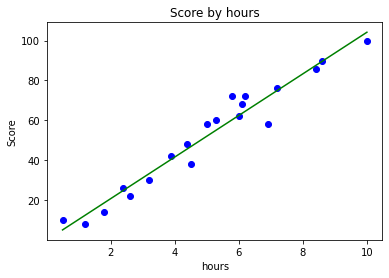

In [8]:
plt.scatter(X, Y, color='blue') #흩뿌리기, 산점도 그래프로 표현
plt.plot(X, y_pred, color='green') #선 그래프로 표현, y값은 예측값으로
plt.title('Score by hours') #제목
plt.xlabel('hours') #X 축 이름
plt.ylabel('Score') #Y 축 이름
plt.show() #호출!

In [9]:
print('9시간 공부했을 때 예상 점수 : ', reg.predict([[9]])) #2차원 배열 형태로 들어가야 함, [[9], [8], [7]]

9시간 공부했을 때 예상 점수 :  [93.77478776]


In [10]:
reg.coef_ #기울기 m

array([10.44369694])

In [11]:
reg.intercept_ #y 절편

-0.21848470286721522

y = mx + b -> y = 10.4436x - 0.2184

x에 9를 대입하면 93.774 값이 나온다.

### 데이터 세트 분리

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('LinearRegressionData.csv') #판다스로 csv파일 불러오기
dataset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
from sklearn.model_selection import train_test_split #튜플 형태로 값이 4개가 나온다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0) #훈련 80 : 테스트 20으로 분리

In [6]:
X, len(X) #X 전체 데이터와 개수

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [7]:
X_train, len(X_train) #X_train 전체 데이터와 개수

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

개수가 80%인 16개이며 랜덤으로 섞여있다.

In [8]:
X_test, len(X_test) #X_test 전체 데이터와 개수

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

개수가 20%인 4개이며 랜덤으로 섞여있다.

In [10]:
y, len(y) #y 전체 데이터와 개수

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64),
 20)

In [11]:
y_train, len(y_train) #y_train 전체 데이터와 개수

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62],
       dtype=int64),
 16)

In [12]:
y_test, len(y_test) #y_test 전체 데이터와 개수

(array([ 90,   8, 100,  38], dtype=int64), 4)

### 분리된 데이터를 통한 모델링

In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() #회귀 모델 객체 생성

In [15]:
reg.fit(X_train, y_train) #훈련 세트만으로 학습

LinearRegression()

### 데이터 시각화하기 (훈련 세트)

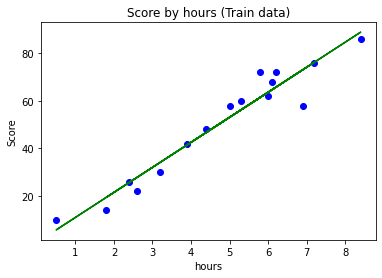

In [17]:
plt.scatter(X_train, y_train, color='blue') #흩뿌리기, 산점도 그래프로 표현
plt.plot(X_train, reg.predict(X_train), color='green') #선 그래프로 표현, y값은 예측값으로
plt.title('Score by hours (Train data)') #제목
plt.xlabel('hours') #X 축 이름
plt.ylabel('Score') #Y 축 이름
plt.show() #호출!

### 데이터 시각화하기 (테스트 세트)

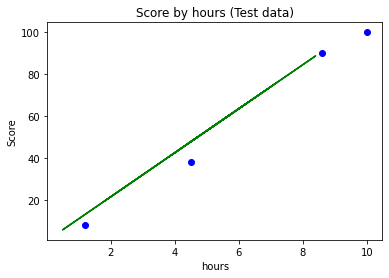

In [18]:
plt.scatter(X_test, y_test, color='blue') #흩뿌리기, 산점도 그래프로 표현
plt.plot(X_train, reg.predict(X_train), color='green') #선 그래프로 표현, y값은 예측값으로
plt.title('Score by hours (Test data)') #제목
plt.xlabel('hours') #X 축 이름
plt.ylabel('Score') #Y 축 이름
plt.show() #호출!

In [20]:
reg.coef_

array([10.49161294])

In [21]:
reg.intercept_

0.6115562905169796

사용된 데이터가 다르기 때문에 결과 모델도 다를 수 밖에 없다!

### 모델 평가

In [22]:
reg.score(X_test, y_test) #테스트 세트를 통한 모델 평가, 1이 100점임

0.9727616474310156

In [25]:
reg.score(X_train, y_train) #훈련 세트를 통한 모델 평가

0.9356663661221668

## 경사 하강법 (Gradient Descent)

max_iter : 훈련 세트 반복 횟수 (Epoch 횟수)  

eta0 : 학습률 (learning rate)  

verbose : 훈련 세트를 반복하며 손실이 얼마나 줄어드는지 보여줌

학습률이 커질수록 에포크가 많아진다! 에포크가 학습률에 비해 적으면 경고가 뜬다.

In [35]:
from sklearn.linear_model import SGDRegressor # SGD : Stochastic Gradient Decent 확률적 경사 하강법
sr = SGDRegressor(max_iter=1000, eta0=0.001, random_state=0, verbose=1) #객체 생성
sr.fit(X_train, y_train)

-- Epoch 1
Norm: 2.40, NNZs: 1, Bias: 0.442470, T: 16, Avg. loss: 1181.034371
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.84, NNZs: 1, Bias: 0.697455, T: 32, Avg. loss: 754.011321
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 4.89, NNZs: 1, Bias: 0.881472, T: 48, Avg. loss: 520.842928
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 5.70, NNZs: 1, Bias: 1.023556, T: 64, Avg. loss: 374.527388
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 6.34, NNZs: 1, Bias: 1.137258, T: 80, Avg. loss: 277.717040
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 6.88, NNZs: 1, Bias: 1.230635, T: 96, Avg. loss: 210.603548
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 7.32, NNZs: 1, Bias: 1.308149, T: 112, Avg. loss: 162.433366
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 7.69, NNZs: 1, Bias: 1.372847, T: 128, Avg. loss: 127.468199
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 8.01, NNZs: 1, Bias: 1.427757, T: 144, Avg. loss: 101.814505
Total training time: 0.

SGDRegressor(eta0=0.001, random_state=0, verbose=1)

### 데이터 시각화

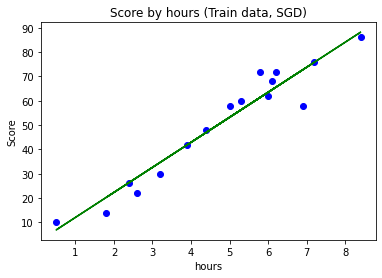

In [36]:
plt.scatter(X_train, y_train, color='blue') #흩뿌리기, 산점도 그래프로 표현
plt.plot(X_train, sr.predict(X_train), color='green') #선 그래프로 표현, y값은 예측값으로
plt.title('Score by hours (Train data, SGD)') #제목
plt.xlabel('hours') #X 축 이름
plt.ylabel('Score') #Y 축 이름
plt.show() #호출!

In [31]:
sr.coef_, sr.intercept_ #훈련 데이터의 점수와 비교해야 함

(array([10.24418243]), array([1.69795665]))

In [33]:
sr.score(X_test, y_test) #테스트 세트를 통한 모델 평가

0.9737777515620518

In [34]:
sr.score(X_train, y_train) #훈련 세트를 통한 모델 평가

0.9351323711852393